# Sprawozdanie z laboratorium 4
### Maria Kędzierska 305704

## Opis tematu
Tematem laboratorium było dodanie funkcji aktywacji softmax, tak aby umożliwić klasyfikację.

## Opis wykonanej pracy
Zaimplementowałam funkcję aktywacji `softmax` oraz odpowiednio zmodyfikowałam liczenie się błędów i propagację wsteczną.
Wytrenowałam 6 sieci, po dwie dla każdego zbioru danych, różniące się funkcją aktywacji na ostatniej warstwie.

## Wnioski i przeprowadzone eksperymenty
Zastosowanie funkcji liniowej na wyjściu i MSE jako funkcji starty wypadło bardzo podobnie jak zastosowanie aktywacji softmax i kross entropii jako funkcji straty.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from network import NN
from activation_functions import *
from metrics import *
from prepare_data import read_classification_data
os.chdir('..')

## Zbiór rings3-regular

In [2]:
r3_x_train, r3_y_train, r3_x_test, r3_y_test = read_classification_data(
    dataset_name='rings3-regular')

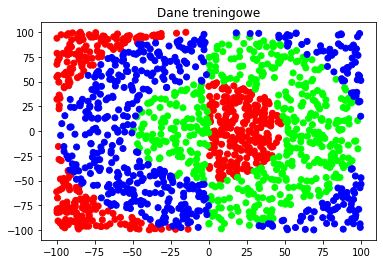

In [3]:
plt.scatter(r3_x_train[:, 0], r3_x_train[:, 1], c=r3_y_train)
plt.title('Dane treningowe')
plt.show()

### Aktywacja softmax

In [4]:
nn_r3 = NN(input_shape=r3_x_train.shape, activations=[Sigmoid(), Sigmoid(), Softmax()], neurons_num=[32, 16, 3], seed=12)
nn_r3.fit(r3_x_train, r3_y_train, batch_size=4, n_epochs=630, learning_rate=0.003, loss=cross_entropy, metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=10)

Epoch number 10/630
Loss on training set: 0.5681999081026118 f_score on training set: 0.5242139905251268, loss on test set: 0.5591052960261506 f_score on test set: 0.5721104065725722
Epoch number 20/630
Loss on training set: 0.5591613646920399 f_score on training set: 0.5313148373529387, loss on test set: 0.5507216617688042 f_score on test set: 0.585288895859718
Epoch number 30/630
Loss on training set: 0.5735559904978486 f_score on training set: 0.4905393799245619, loss on test set: 0.5592756106418536 f_score on test set: 0.5338194764028742
Epoch number 40/630
Loss on training set: 0.5553203797271227 f_score on training set: 0.5380869314747669, loss on test set: 0.5635296811808429 f_score on test set: 0.5346110883755678
Epoch number 50/630
Loss on training set: 0.5332556101067543 f_score on training set: 0.5517281953588428, loss on test set: 0.5275244630454153 f_score on test set: 0.5738442447224531
Epoch number 60/630
Loss on training set: 0.5297871198058025 f_score on training set: 

### Aktywacja liniowa

In [5]:
nn_r3l = NN(input_shape=r3_x_train.shape, activations=[Sigmoid(), Sigmoid(), Linear()], neurons_num=[32, 16, 3], seed=12)
nn_r3l.fit(r3_x_train, r3_y_train, batch_size=4, n_epochs=630, learning_rate=0.003, loss=mse, metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=10)

Epoch number 10/630
Loss on training set: 0.1888395612357591 f_score on training set: 0.5313994413539459, loss on test set: 0.18312901714365826 f_score on test set: 0.5892224279467275
Epoch number 20/630
Loss on training set: 0.18765550082119262 f_score on training set: 0.5406372484543766, loss on test set: 0.18330642035597328 f_score on test set: 0.5845130303938337
Epoch number 30/630
Loss on training set: 0.17900008150138128 f_score on training set: 0.584791455156107, loss on test set: 0.17467255447941146 f_score on test set: 0.603542244583765
Epoch number 40/630
Loss on training set: 0.17682330831076143 f_score on training set: 0.5553966146130564, loss on test set: 0.17861044222999906 f_score on test set: 0.5659116507695152
Epoch number 50/630
Loss on training set: 0.16686562214548975 f_score on training set: 0.6075439679523749, loss on test set: 0.16818910521123526 f_score on test set: 0.62812276799453
Epoch number 60/630
Loss on training set: 0.17448502655713385 f_score on trainin

### Porównanie metod

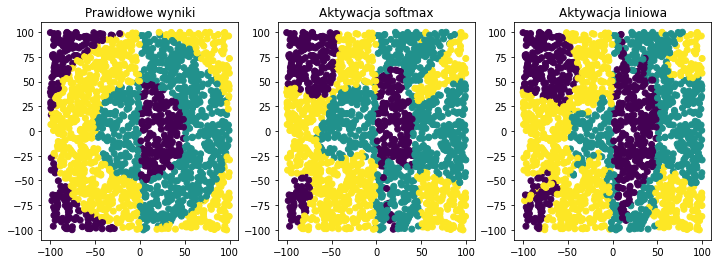

In [9]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(r3_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(nn_r3.predict(r3_x_test), axis=1))
plt.title('Aktywacja softmax')
plt.subplot(133)
plt.title('Aktywacja liniowa')
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(nn_r3l.predict(r3_x_test), axis=1))
plt.show()

## Zbiór easy

In [10]:
e_x_train, e_y_train, e_x_test, e_y_test = read_classification_data(
    dataset_name='easy')

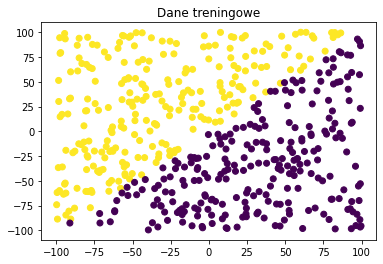

In [12]:
plt.scatter(e_x_train[:, 0], e_x_train[:, 1], c=e_y_train[:, 0])
plt.title('Dane treningowe')
plt.show()

### Aktywacja softmax

In [13]:
nn_easy = NN(input_shape=e_x_train.shape, activations=[Sigmoid(), Softmax()], neurons_num=[16, 2], seed=12)

In [14]:
nn_easy.fit(e_x_train, e_y_train, batch_size=4, n_epochs=6, learning_rate=0.001, loss=cross_entropy, metric=f_score, x_test=e_x_test, y_test=e_y_test, verbose_step=1)

Epoch number 1/6
Loss on training set: 0.28673791344963134 f_score on training set: 0.890725421314209, loss on test set: 0.26726374242171747 f_score on test set: 0.9194324045407636
Epoch number 2/6
Loss on training set: 0.15135027884678634 f_score on training set: 0.9639792520491803, loss on test set: 0.14395953467515454 f_score on test set: 0.9719932773109244
Epoch number 3/6
Loss on training set: 0.10668563074896004 f_score on training set: 0.9839959029511555, loss on test set: 0.10163718166575567 f_score on test set: 0.991999615944696
Epoch number 4/6
Loss on training set: 0.08993453850293767 f_score on training set: 0.9879992319508449, loss on test set: 0.08680981159160037 f_score on test set: 0.988
Epoch number 5/6
Loss on training set: 0.07764592948625051 f_score on training set: 0.995999935998976, loss on test set: 0.0746649483817545 f_score on test set: 0.9939994959011966
Epoch number 6/6
Loss on training set: 0.06804892653425507 f_score on training set: 0.9919994879672299, los

### Aktywacja liniowa

In [21]:
nn_easy_l = nn_easy = NN(input_shape=e_x_train.shape, activations=[Sigmoid(), Linear()], neurons_num=[16, 2], seed=40)
nn_easy_l.fit(e_x_train, e_y_train, batch_size=4, n_epochs=6, learning_rate=0.001, loss=mse, metric=f_score, x_test=e_x_test, y_test=e_y_test, verbose_step=1)

Epoch number 1/6
Loss on training set: 0.12897488551851927 f_score on training set: 0.899974393444722, loss on test set: 0.1405338271151506 f_score on test set: 0.8879569809871327
Epoch number 2/6
Loss on training set: 0.0797349211055449 f_score on training set: 0.933999735998944, loss on test set: 0.08318857971828404 f_score on test set: 0.9299941197883123
Epoch number 3/6
Loss on training set: 0.04145356337580458 f_score on training set: 0.9779992079714871, loss on test set: 0.046335762689219524 f_score on test set: 0.9779995599982398
Epoch number 4/6
Loss on training set: 0.02541682136939437 f_score on training set: 0.9979999919999679, loss on test set: 0.025244296684621945 f_score on test set: 1.0
Epoch number 5/6
Loss on training set: 0.022921619837424082 f_score on training set: 0.9919998719979519, loss on test set: 0.023025837584038106 f_score on test set: 0.995999807972348
Epoch number 6/6
Loss on training set: 0.019847273714173174 f_score on training set: 0.996, loss on test s

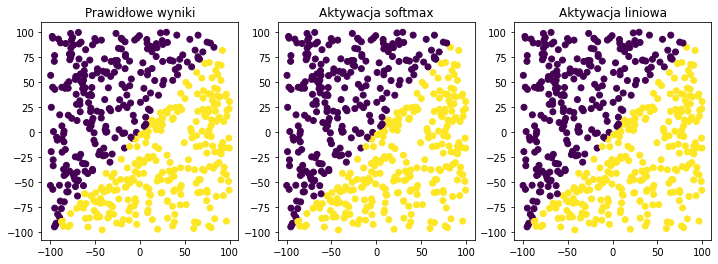

In [22]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(e_x_test[:, 0], e_x_test[:, 1], c=np.argmax(e_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(e_x_test[:, 0], e_x_test[:, 1], c=np.argmax(nn_easy.predict(e_x_test), axis=1))
plt.title('Aktywacja softmax')
plt.subplot(133)
plt.title('Aktywacja liniowa')
plt.scatter(e_x_test[:, 0], e_x_test[:, 1], c=np.argmax(nn_easy_l.predict(e_x_test), axis=1))
plt.show()

## Zbiór xor3

In [23]:
xor_x_train, xor_y_train, xor_x_test, xor_y_test = read_classification_data(
    dataset_name='xor3')

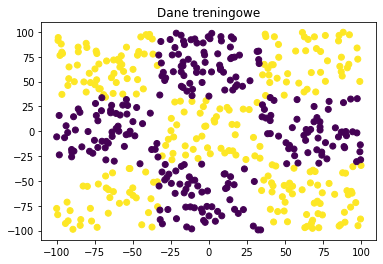

In [24]:
plt.scatter(xor_x_train[:, 0], xor_x_train[:, 1], c=xor_y_train[:, 0])
plt.title('Dane treningowe')
plt.show()

### Aktywacja softmax

In [28]:
nn_xor3 = NN(input_shape=xor_x_train.shape, activations=[Sigmoid(), Sigmoid(), Softmax()], neurons_num=[32, 32, 2], seed=40)
nn_xor3.fit(xor_x_train, xor_y_train, batch_size=4, n_epochs=300, learning_rate=0.0001, loss=cross_entropy, metric=f_score, x_test=xor_x_test, y_test=xor_y_test, verbose_step=10)
nn_xor3.fit(xor_x_train, xor_y_train, batch_size=4, n_epochs=300, learning_rate=0.00003, loss=cross_entropy, metric=f_score, x_test=xor_x_test, y_test=xor_y_test, verbose_step=10)

Epoch number 10/300
Loss on training set: 0.7276194055949211 f_score on training set: 0.5795694791466462, loss on test set: 0.7012737435401664 f_score on test set: 0.6145086072740691
Epoch number 20/300
Loss on training set: 0.6431093903907674 f_score on training set: 0.5841887260908518, loss on test set: 0.6520967776964669 f_score on test set: 0.5910614365964612
Epoch number 30/300
Loss on training set: 0.6142312723047972 f_score on training set: 0.6082937274768894, loss on test set: 0.6417647987307777 f_score on test set: 0.582623462814757
Epoch number 40/300
Loss on training set: 0.6001955926399861 f_score on training set: 0.6388085120121391, loss on test set: 0.6330797205743194 f_score on test set: 0.611556010230179
Epoch number 50/300
Loss on training set: 0.5885526142506208 f_score on training set: 0.681203007518797, loss on test set: 0.6245073294493126 f_score on test set: 0.657906624934794
Epoch number 60/300
Loss on training set: 0.5770776255343788 f_score on training set: 0.7

### Aktywacja liniowa

In [29]:
nn_xor3_l = NN(input_shape=xor_x_train.shape, activations=[Sigmoid(), Sigmoid(), Linear()], neurons_num=[32, 32, 2], seed=40)
nn_xor3_l.fit(xor_x_train, xor_y_train, batch_size=4, n_epochs=300, learning_rate=0.001, loss=mse, metric=f_score, x_test=xor_x_test, y_test=xor_y_test, verbose_step=10)
nn_xor3_l.fit(xor_x_train, xor_y_train, batch_size=4, n_epochs=300, learning_rate=0.0003, loss=mse, metric=f_score, x_test=xor_x_test, y_test=xor_y_test, verbose_step=10)

Epoch number 10/300
Loss on training set: 0.14715617887195054 f_score on training set: 0.8479610780359772, loss on test set: 0.16863536157151657 f_score on test set: 0.8094266888993216
Epoch number 20/300
Loss on training set: 0.1224330223120723 f_score on training set: 0.8679239241803279, loss on test set: 0.1400378106535424 f_score on test set: 0.8305899512846672
Epoch number 30/300
Loss on training set: 0.11067442247098931 f_score on training set: 0.8679809892624537, loss on test set: 0.12800957900937465 f_score on test set: 0.8348874037163746
Epoch number 40/300
Loss on training set: 0.10288398651027586 f_score on training set: 0.871967223609244, loss on test set: 0.1253805479992602 f_score on test set: 0.8427071128168029
Epoch number 50/300
Loss on training set: 0.09818176363379306 f_score on training set: 0.8739147663820743, loss on test set: 0.11659955895058118 f_score on test set: 0.8422697121890824
Epoch number 60/300
Loss on training set: 0.09392132342906521 f_score on traini

### Porównanie

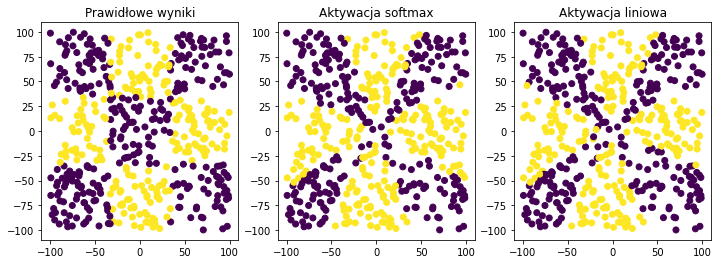

In [31]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(xor_x_test[:, 0], xor_x_test[:, 1], c=np.argmax(xor_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(xor_x_test[:, 0], xor_x_test[:, 1], c=np.argmax(nn_xor3.predict(xor_x_test), axis=1))
plt.title('Aktywacja softmax')
plt.subplot(133)
plt.title('Aktywacja liniowa')
plt.scatter(xor_x_test[:, 0], xor_x_test[:, 1], c=np.argmax(nn_xor3_l.predict(xor_x_test), axis=1))
plt.show()